In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/hotel_booking.csv')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop columns with excessive missing values
df.drop(['company'], axis=1, inplace=True)  # 'company' has many missing values

# Impute missing values in 'agent' and 'children'
df['agent'].fillna(0, inplace=True)
df['children'].fillna(0, inplace=True)

# Verify that missing values are handled
print(df.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

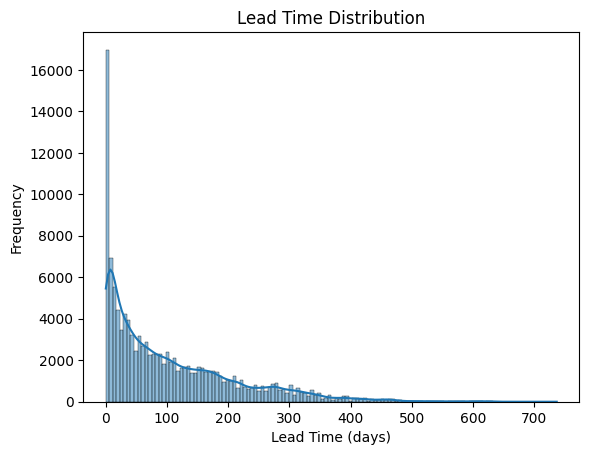

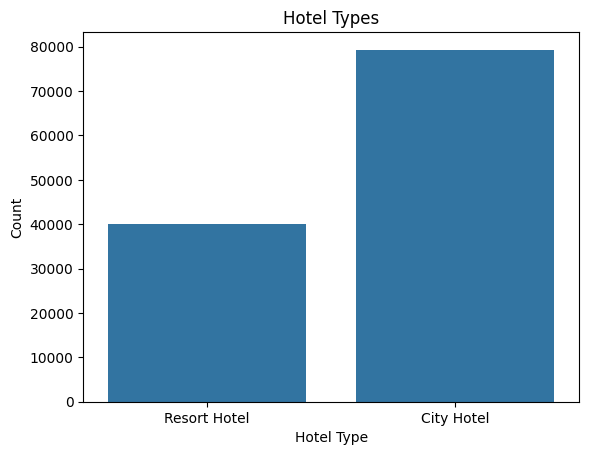

In [ ]:

# Distribution of 'lead_time'
sns.histplot(df['lead_time'], kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

# Count plot for 'hotel' type
sns.countplot(x='hotel', data=df)
plt.title('Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()


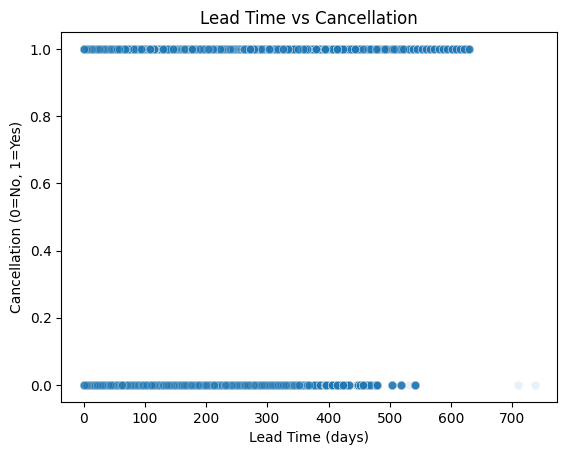

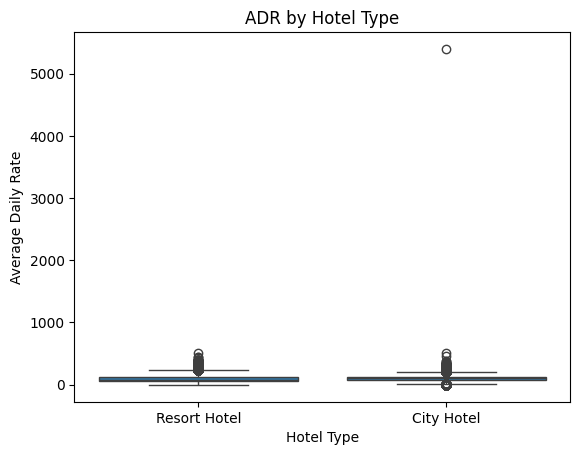

In [ ]:
# Relationship between 'lead_time' and 'is_canceled'
sns.scatterplot(x='lead_time', y='is_canceled', data=df, alpha=0.1)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation (0=No, 1=Yes)')
plt.show()

# Boxplot of 'adr' (Average Daily Rate) based on 'hotel' type
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('ADR by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate')
plt.show()


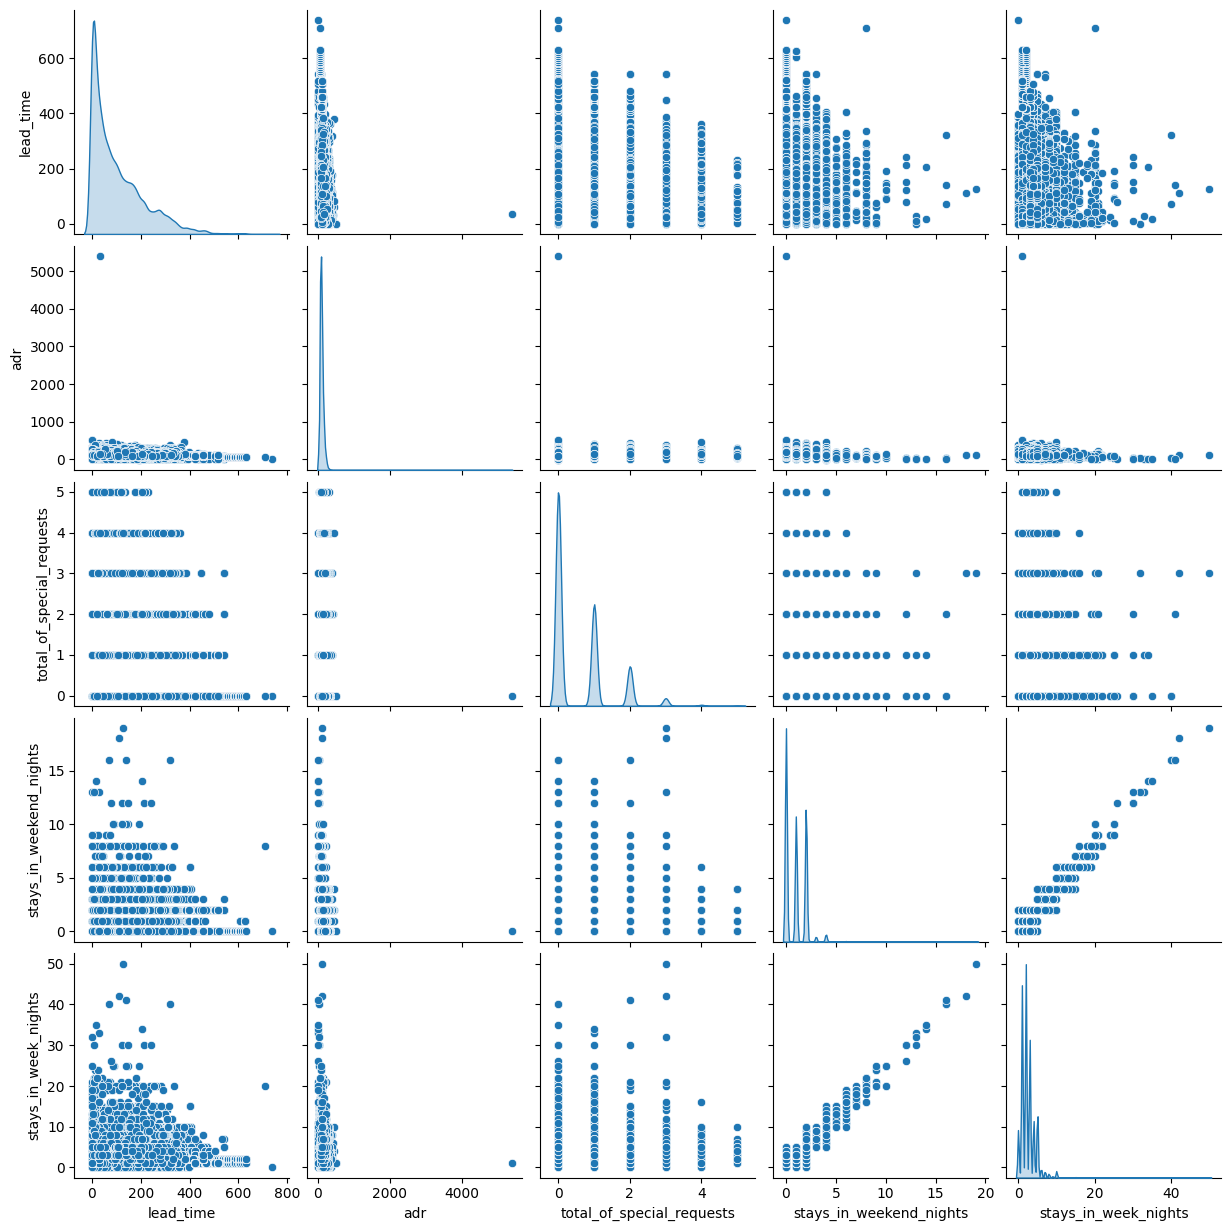

In [ ]:
# Select relevant numerical columns
numeric_cols = ['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']

# Pair plot
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.show()


hotel           City Hotel  Resort Hotel
market_segment                          
Aviation        100.142110           NaN
Complementary     2.600424      3.657413
Corporate        83.119980     51.563183
Direct          119.479682    111.670840
Groups           84.921885     66.446964
Offline TA/TO    93.017660     74.662571
Online TA       118.919533    113.432480
Undefined        15.000000           NaN


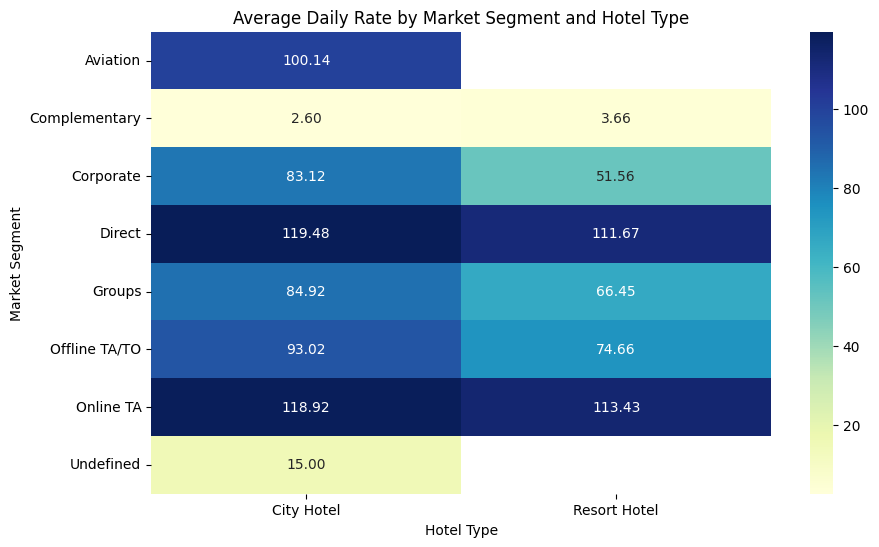

In [ ]:
# Pivot table
pivot_table = df.pivot_table(values='adr', index='market_segment', columns='hotel', aggfunc='mean')
print(pivot_table)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Daily Rate by Market Segment and Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Market Segment')
plt.show()


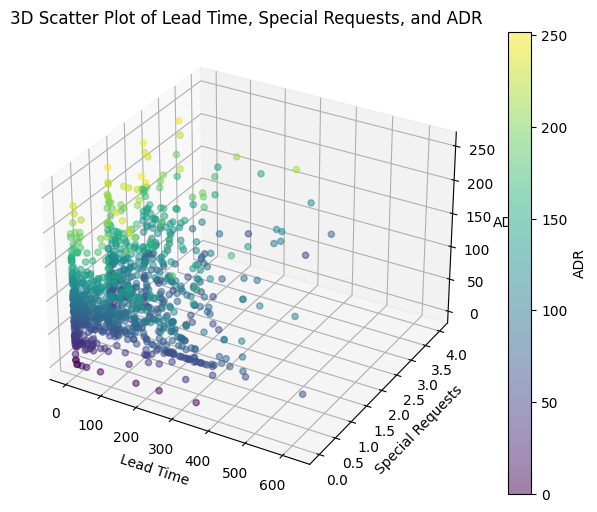

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
subset = df.sample(1000)  # Sample for visualization
X = subset['lead_time']
Y = subset['total_of_special_requests']
Z = subset['adr']

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', alpha=0.5)
ax.set_xlabel('Lead Time')
ax.set_ylabel('Special Requests')
ax.set_zlabel('ADR')
plt.title('3D Scatter Plot of Lead Time, Special Requests, and ADR')
fig.colorbar(scatter, ax=ax, label='ADR')
plt.show()



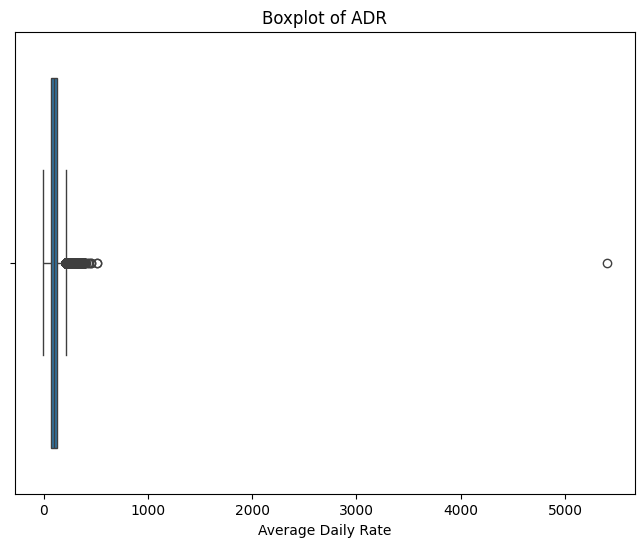

In [ ]:
# Boxplot of 'adr'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['adr'])
plt.title('Boxplot of ADR')
plt.xlabel('Average Daily Rate')
plt.show()


In [ ]:
from scipy import stats
import numpy as np

# Calculate Z-scores
df['adr_zscore'] = np.abs(stats.zscore(df['adr']))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = df[df['adr_zscore'] > threshold]
print(f'Number of outliers in ADR: {outliers.shape[0]}')

# Remove outliers
df = df[df['adr_zscore'] <= threshold]


Number of outliers in ADR: 1138


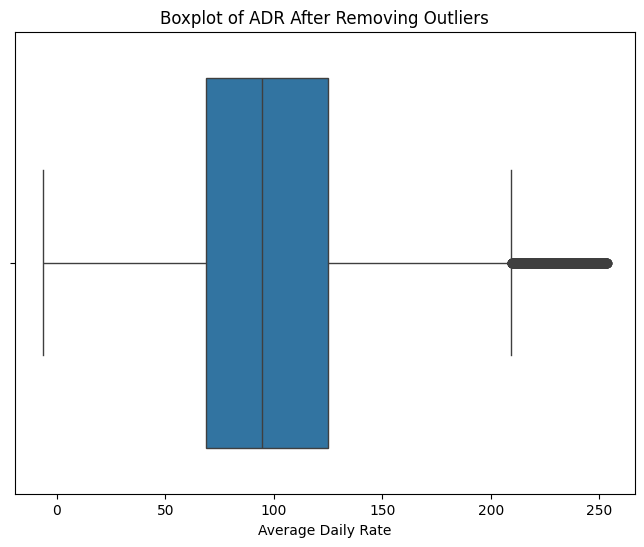

In [ ]:
# Boxplot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['adr'])
plt.title('Boxplot of ADR After Removing Outliers')
plt.xlabel('Average Daily Rate')
plt.show()


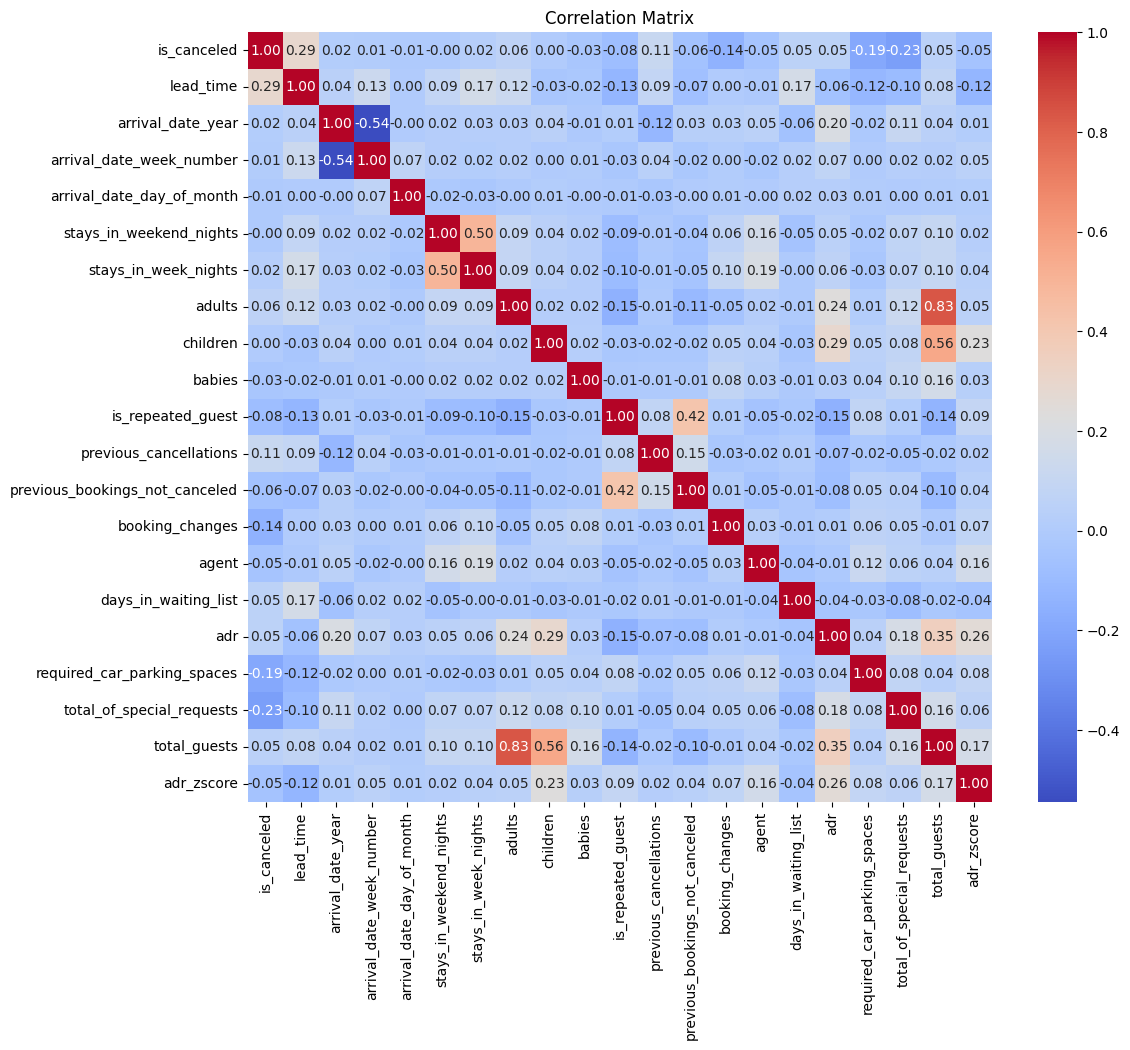

In [ ]:
# Select only numerical columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


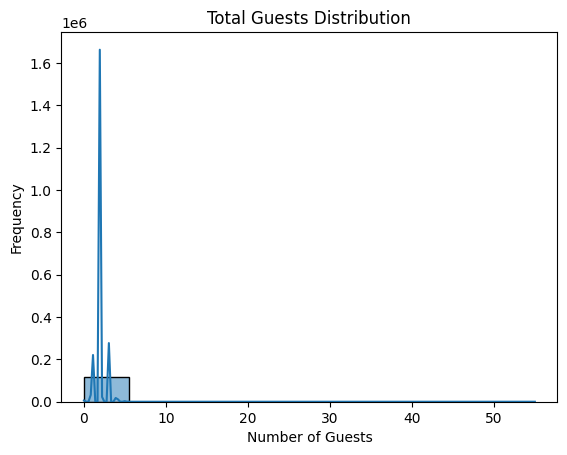

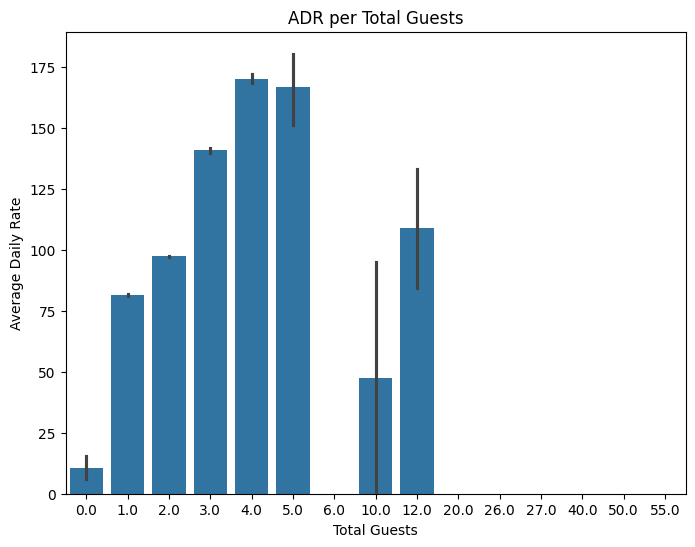

In [ ]:
# Create 'total_guests' feature
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Analyze 'total_guests' distribution
sns.histplot(df['total_guests'], bins=10, kde=True)
plt.title('Total Guests Distribution')
plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.show()

# Analyze 'adr' per 'total_guests'
plt.figure(figsize=(8, 6))
sns.barplot(x='total_guests', y='adr', data=df)
plt.title('ADR per Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Average Daily Rate')
plt.show()
